In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

df = pd.read_csv('./data/es_pct_updated.csv')

# df.rename(columns={'PCT':'Marks'}, inplace=True)
df.rename(columns={'ID NO':'ID'}, inplace=True)

# drop midsem and best4 quizzes columns
df.drop(['Midsem', 'Best-4 Quizzes'], axis=1, inplace=True)

%load_ext autoreload
%autoreload 2

df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,ID,Name,PCT
0,2020B5PS2011P,Jaanavi Chaubey,16.0
1,2021D2TS2075P,MS. JAYSHREE,6.0
2,2022A1PS0530P,IRA DOGRA,33.0
3,2022A1PS0589P,ASLESH JAMBHALE,93.0
4,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,60.0
...,...,...,...
579,2022AAPS0363P,NISHKARSH JAIN,105.0
580,2022AAPS0366P,DIWAKAR MITTAL,71.0
581,2022AAPS0369P,SUBRAT ROY,73.0
582,2022AAPS1191P,SHAILENDRA KUMAR GUPTA,66.0


In [28]:
df2 = pd.read_csv('./data/es_compre.csv')

df2.rename(columns={'Compre Marks(135)':'compre'}, inplace=True)
df2.rename(columns={'ID NO':'ID'}, inplace=True)

# drop name column
df2.drop(columns=['Name'], inplace=True)

# convert nan to 0
df2['compre'] = df2['compre'].fillna(0)

df2

,ID,compre
0,2020B5PS2011P,15
1,2021D2TS2075P,0
2,2022A1PS0530P,0
3,2022A1PS0589P,86
4,2022A1PS0593P,65
...,...,...
581,2022AAPS0363P,53
582,2022AAPS0366P,62
583,2022AAPS0369P,67
584,2022AAPS1191P,44


In [33]:
# join the two dataframes
df3 = df.join(df2.set_index('ID'), on='ID')
df3['Marks'] = df3['PCT'].astype(float) + df3['compre'].astype(float)
df3

,ID,Name,PCT,compre,Marks
0,2020B5PS2011P,Jaanavi Chaubey,16.0,15,31.0
1,2021D2TS2075P,MS. JAYSHREE,6.0,0,6.0
2,2022A1PS0530P,IRA DOGRA,33.0,0,33.0
3,2022A1PS0589P,ASLESH JAMBHALE,93.0,86,179.0
4,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI,60.0,65,125.0
...,...,...,...,...,...
579,2022AAPS0363P,NISHKARSH JAIN,105.0,53,158.0
580,2022AAPS0366P,DIWAKAR MITTAL,71.0,62,133.0
581,2022AAPS0369P,SUBRAT ROY,73.0,67,140.0
582,2022AAPS1191P,SHAILENDRA KUMAR GUPTA,66.0,44,110.0


In [34]:
# check for nans
df3.isnull().sum()

ID        0
Name      0
PCT       0
compre    0
Marks     0
dtype: int64

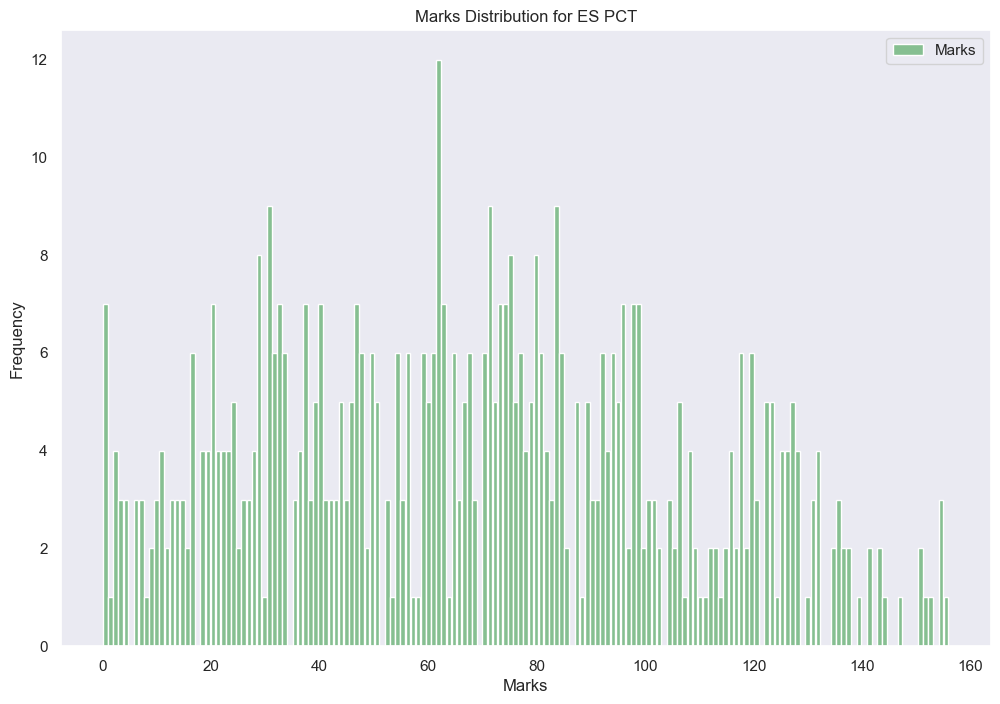

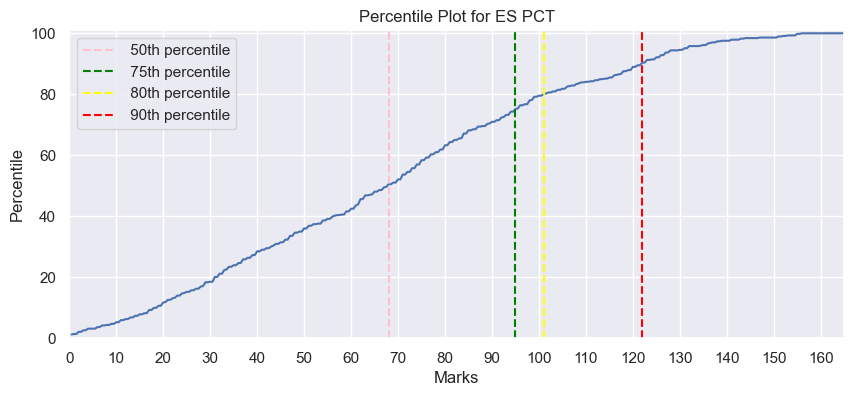

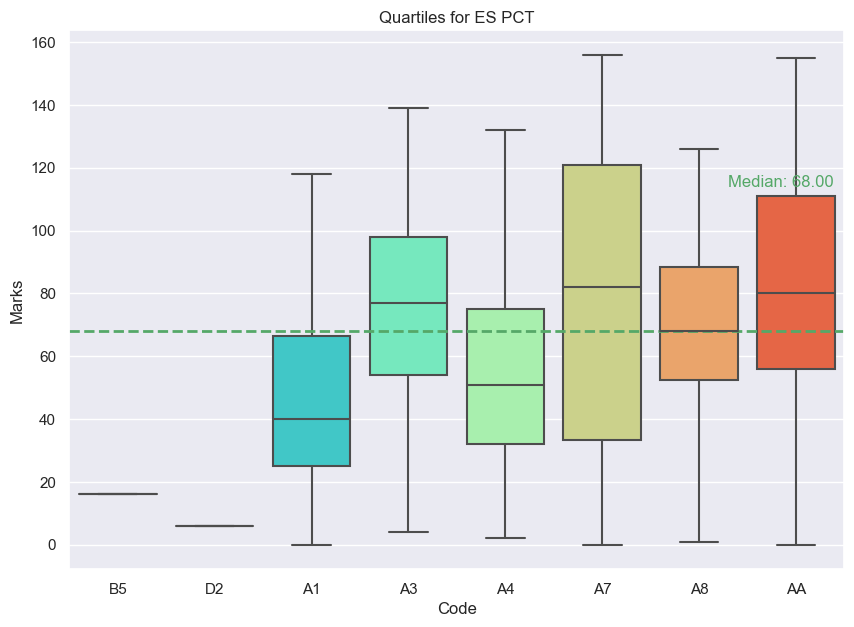

In [7]:
from graph_gen import graph

g = graph('ES PCT', df, 165)
g.gen_all()

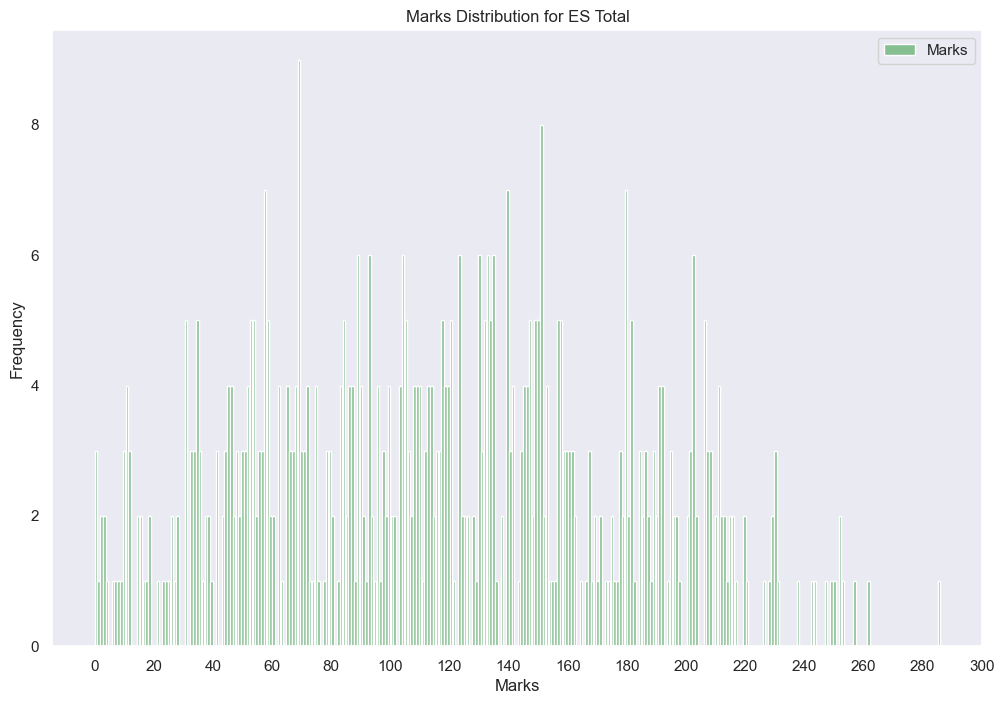

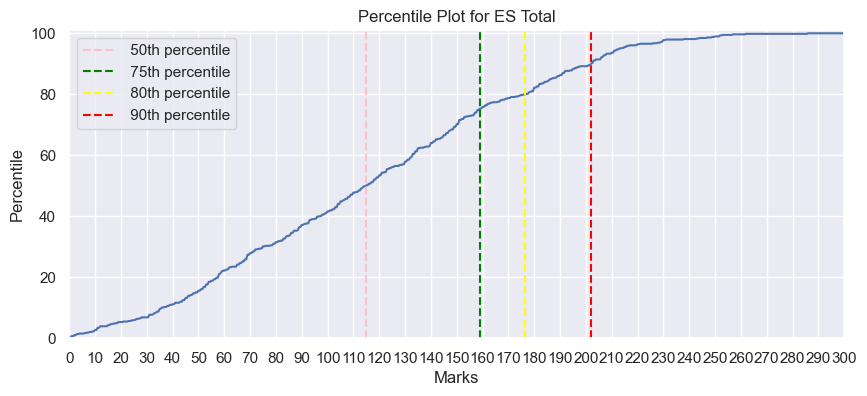

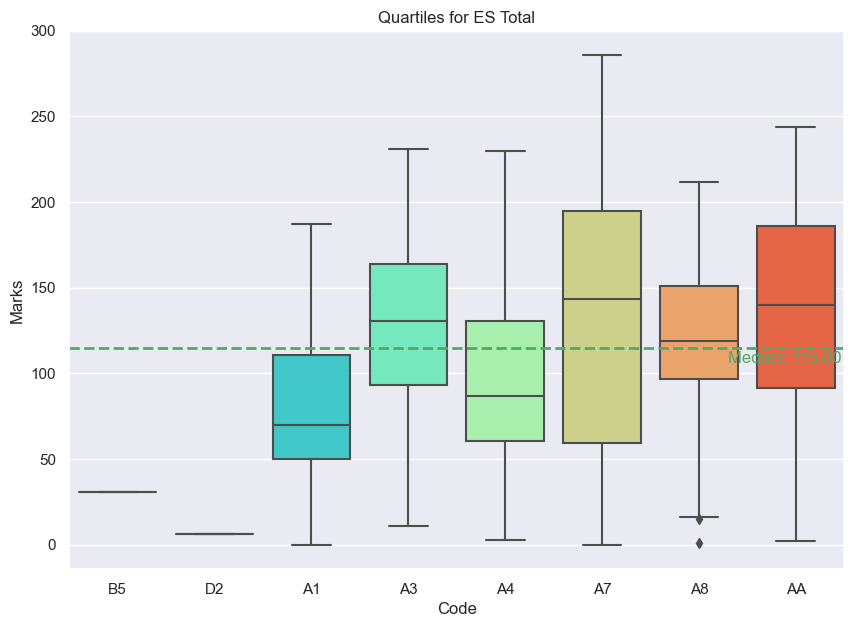

In [36]:
from graph_gen import graph

g2 = graph('ES Total', df3, 300)
g2.gen_all()